In [45]:
import pandas as pd
df = pd.read_csv("Clean_Dataset.csv")

In [2]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


# Relevant and Irrelevant columns & general notes before data preprocessing
irrelevant = flight, unnamed = 0
price is our target value
class is the most important feature
fields like departure_time,arline, arrival_time contain categorical data for which we will use one hot encoding to convert into numerical for processing


In [ ]:
df.airline.value_counts()
# since we have only 6 airlines, it will be safe to use one hot encoding (yes/no 1/0 for every airline)

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [6]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [7]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [8]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [9]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [ ]:
df.stops.value_counts()
# ordinal encoding

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [ ]:
df['class'].value_counts()
# binary encode (0/1)

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [14]:
df['duration'].min()

np.float64(0.83)

In [15]:
df.duration.max()

np.float64(49.83)

In [ ]:
df.duration.median()
# hours

np.float64(11.25)

## Preprocessing

In [46]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('flight', axis=1)

df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)  # binary feature

# df['stops'] = df['stops'].apply(lambda x: 1 if x == 'one' else 2 if x == 'two_or_more' else 0)
df.stops = pd.factorize(df.stops)[0]


In [47]:
df = df.join(pd.get_dummies(df.airline, prefix= "airline")).drop('airline', axis=1)

In [48]:
df = df.join(pd.get_dummies(df.source_city, prefix= "source_city")).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix= "dest")).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix= "arrival")).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix= "departure")).drop('departure_time', axis=1)

In [49]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
300151,1,1,10.00,49,81585,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


In [50]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols]= df[bool_cols].astype(int)
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


## Training Regression Model

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = df.drop('price', axis=1), df.price

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [54]:
reg = RandomForestRegressor(n_jobs= -1) # to maximize no. of processors used
reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [ ]:
reg.score(X_test, y_test) # unseen data

0.984815390592525

# more metrics

MAE is measured as the average absolute difference between the predicted values and the actual values and is used to assess the effectiveness of a regression model.
it measures on avg how much you deviate from actual price (in actual currency)

In [57]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(X_test)
print("R2 score: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred)))

R2 score:  0.984815390592525
MAE:  1090.4214763869654
MSE:  7848625.222087162
RMSE:  2801.5397948426794


Text(0.5, 1.0, 'Prediction Vs. Actual Price')

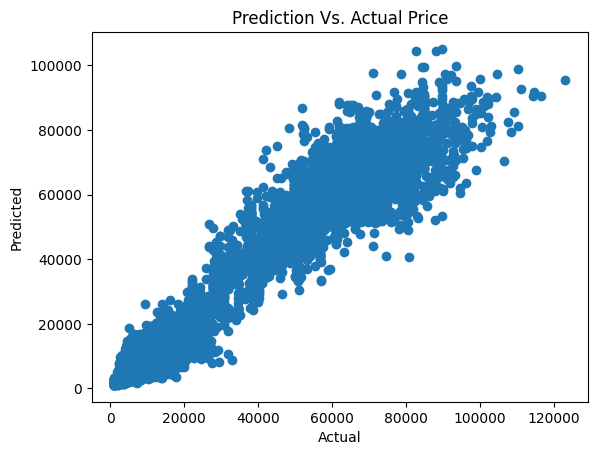

In [58]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Prediction Vs. Actual Price")

### Feature Importance

In [59]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key = lambda x: x[1], reverse=True)

sorted_importances

[('class', np.float64(0.8803166769839565)),
 ('duration', np.float64(0.05736299597339628)),
 ('days_left', np.float64(0.01853850532250612)),
 ('airline_Air_India', np.float64(0.005656138121452131)),
 ('airline_Vistara', np.float64(0.004290737553910977)),
 ('source_city_Delhi', np.float64(0.003695559034161642)),
 ('dest_Delhi', np.float64(0.003438814240204496)),
 ('source_city_Mumbai', np.float64(0.0022194633763066847)),
 ('dest_Mumbai', np.float64(0.001973728796531755)),
 ('dest_Kolkata', np.float64(0.0017576798737622885)),
 ('stops', np.float64(0.0017527109832708124)),
 ('source_city_Kolkata', np.float64(0.001735923849546983)),
 ('dest_Hyderabad', np.float64(0.0015661263199106801)),
 ('arrival_Evening', np.float64(0.0014832796630234117)),
 ('source_city_Hyderabad', np.float64(0.001259426265003171)),
 ('dest_Bangalore', np.float64(0.0012246152248221475)),
 ('arrival_Night', np.float64(0.0011585494270431916)),
 ('source_city_Bangalore', np.float64(0.0011492125438978288)),
 ('departure_E

<BarContainer object of 10 artists>

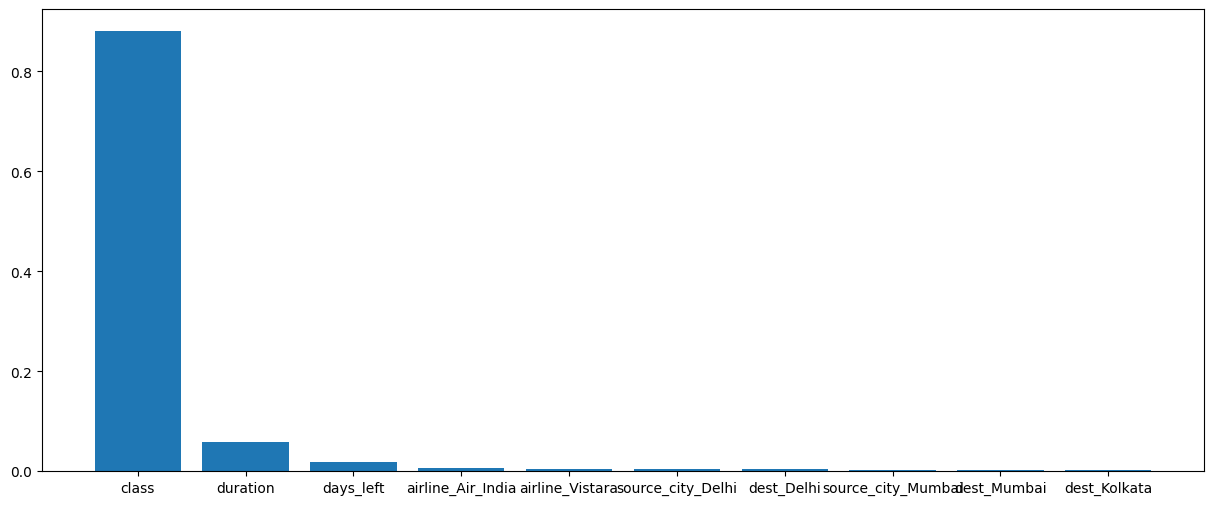

In [60]:
plt.figure(figsize=(15,6))
plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])

## Hyperparameter Tuning

In [ ]:
# dont run this cell
from sklearn.model_selection import GridSearchCV

reg = RandomForestRegressor(n_jobs=-1)

param_grid = {
    'n_estimators' : [100,200,300],
    'max_depth' : [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

In [65]:
# alternate approach: Randomized search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators' : randint(100,300),
    'max_depth' : [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2,11),
    'min_samples_leaf': randint(1, 5),
    'max_features': [1.0, 0.8, 'sqrt', 'log2', None]
}

reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=3,
                                   scoring='neg_mean_squared_error', verbose=2, random_state=10, n_jobs=-1)

random_search.fit(X_train, y_train)

best_regressor = random_search.best_estimator_


Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [66]:
best_regressor.score(X_test,y_test)

0.9857372801451674

In [67]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_regressor.predict(X_test)
print("R2 score: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred)))

R2 score:  0.9857372801451674
MAE:  1106.2150254987357
MSE:  7372118.688354031
RMSE:  2715.1645785023843


Text(0.5, 1.0, 'Prediction Vs. Actual Price')

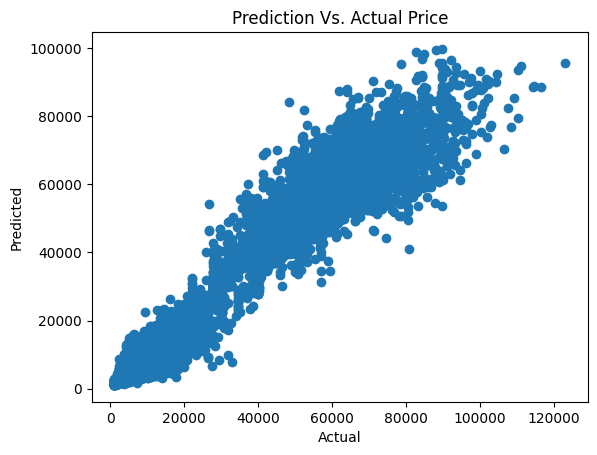

In [68]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Prediction Vs. Actual Price")